# Сборный проект 'Исследование популярности компьютерных игр'

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stas
from scipy import stats as st

## Открытие файла и изучение общей информации

In [2]:
try:
    games = pd.read_csv('games.csv')  # Локальный путь
except:
    games = pd.read_csv('/datasets/games.csv')  # Серверный путь    

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Подготовка данных

### Приведение названия столбцов к нижниму регистру

In [6]:
games.columns=games.columns.str.lower()

### Преобразование данных в нужные типы

In [7]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [8]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [9]:
games['year_of_release']=games['year_of_release'].astype('Int64')
games['critic_score']=games['critic_score'].astype('Int64')

Collumn  `year_of_release` and  `critic_score` contain only integer numbers and `nan` therefore we change the type to `Int64`.

### Обработка пропусков

In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


In [11]:
games[['name', 'genre', 'rating','user_score', 'critic_score','year_of_release']].isna().sum()/games.shape[0]

name               0.000120
genre              0.000120
rating             0.404786
user_score         0.400897
critic_score       0.513192
year_of_release    0.016093
dtype: float64

Доля пропуска в столбцах `year_of_release`, `name` и `genre` очень низкая - возможно это случайные пропуски возникшие из за ошибки при заполнении форм. Доля пропусков в столбце `rating` составляет 40 % - возможно это связано с отсутвием данных. 

Заменяем `None` на `unknown` в колонках с типом object (`name`, `genre`, `rating`)

Пропуски в `year_of_release` составляют 1.6% поэтому их можно удалить. 

In [12]:
games[['name', 'genre', 'rating']] = games[['name', 'genre', 'rating']].fillna('unknown')
games = games.dropna(subset = ['year_of_release'])

In [13]:
games[[]].isna().sum()/games.shape[0]

Series([], dtype: float64)

TBD скорее всего обозначает to be determined, что может быть заменено на `None`. Что позволит перести тип в числа с плавающей точкой и сделать возможным количественный анализ.

In [14]:
games['user_score'] = games['user_score'].replace('tbd',np.NaN)
games['user_score'] = games['user_score'].astype(float)

In [15]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [16]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating                0
dtype: int64

In [17]:
(
    games[(games['critic_score'].isna()) & (games['user_score'].isna()==False)].shape[0]+
    games[(games['critic_score'].isna()==False) & (games['user_score'].isna()==True)].shape[0]
)

1658

In [18]:
games[(games['critic_score'].isna()) & (games['user_score'].isna())].shape[0]

7894

In [19]:
games[(games['critic_score'].isna()==False) & (games['user_score'].isna()==False)].shape[0]

6894

In [20]:
games.shape[0]

16446

In [21]:
games[['user_score','critic_score']].corr()

,user_score,critic_score
user_score,1.000000,0.579671
critic_score,0.579671,1.000000


In [22]:
games['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [23]:
games['critic_score'].unique()

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   41,   36,   31,   27,   35,   26,   19,   28,   23,
   24,   21,   17,   13]
Length: 82, dtype: Int64

Имеется корреляция между 'user_score' и 'critic_score' как в значениях так и в пропусках. Доля пропусков существенная. На данном этапе мы не видем необходимости заменять пропуски для этих столбцов. 

In [24]:
print('Количесво дубликатов в games',games.duplicated().sum() )

Количесво дубликатов в games 0


Действительно, имеются еще и не явные дубликаты

In [25]:
games.duplicated(subset=['name','platform','year_of_release']).sum()

2

In [26]:
games[games.duplicated(subset=['name','platform','year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,unknown,GEN,1993,unknown,0.0,0.00,0.03,0.0,<NA>,NaN,unknown
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.0,83,5.5,E


Удаляем дубликаты

In [27]:
games=games[~games.duplicated(subset=['name','platform','year_of_release'])]
games.duplicated(subset=['name','platform','year_of_release']).sum()

0

### Суммарные продажи по регионам

In [28]:
games['sum_sales']=games[['na_sales', 'eu_sales','jp_sales', 'other_sales']].sum(axis=1)

На втором этапе проекты преобазовали типы столбцов, заполнили пропуски, и добавили новый столбец для суммы продаж во всех регионах. Таким образом мы подготовили данных для анализа данных который будет проведен в следущем разделе.

## Исследовательский анализ данных 

### Кол-во игр по годам

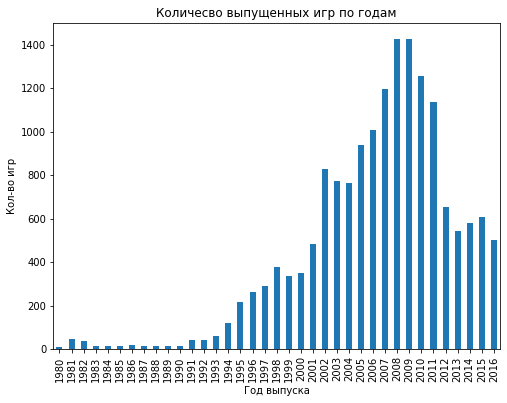

In [29]:
games.groupby('year_of_release')['name'].count().plot(kind='bar',figsize=(8,6))
plt.ylabel("Кол-во игр");
plt.xlabel("Год выпуска");
plt.title('Количесво выпущенных игр по годам');

Данные за период до 1994 года включительно мало значимы для анализа  из-за малого числа выпущеных игр как в абсолютном выражение, так и в относительном в сравнении с более поздними годами. 

### Продажи по платформам

In [30]:
#games.groupby(['year_of_release','platform']).agg(new=('sum_sales','sum'))

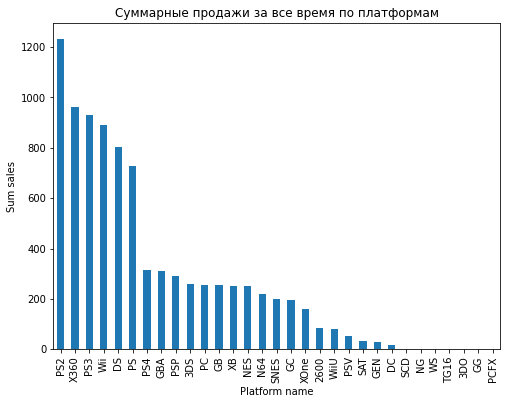

In [31]:
games.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(8,6));

plt.title("Cуммарные продажи за все время по платформам");
plt.ylabel("Sum sales");
plt.xlabel("Platform name");

In [32]:
list_all_platforms=(games.groupby('platform')['sum_sales'].
                        sum().sort_values(ascending=False).
                        index
                   )
list_all_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS',
       'PC', 'GB', 'XB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600', 'WiiU',
       'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16', '3DO', 'GG',
       'PCFX'],
      dtype='object', name='platform')

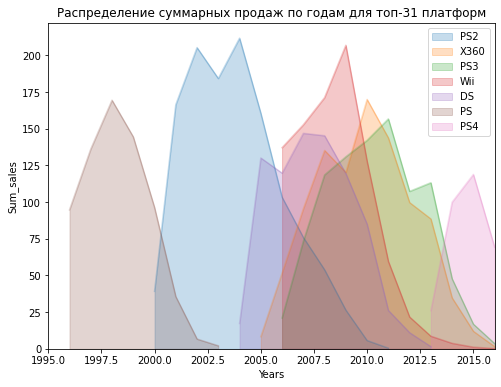

In [33]:
ax=(games[
        (games['platform']==list_all_platforms[0]) & 
        (games['year_of_release']>1995)].
        groupby('year_of_release')['sum_sales'].sum().
        plot(#kind='bar',figsize=(8,6),alpha=0.25,
             kind='area',stacked=False,figsize=(8,6),alpha=0.25,
             xlim=(1995,2016),
             label=list_all_platforms[0],legend=True))
for platform in list_all_platforms[1:7]:
    ax=(games[(games['platform']==platform)&
             (games['year_of_release']>1995)].
        groupby('year_of_release')['sum_sales'].sum().
        plot(#kind='bar',figsize=(8,6),alpha=0.25,
             kind='area',stacked=False,figsize=(8,6),alpha=0.25,
             ax=ax,label=platform,legend=True)
)

plt.title("Распределение суммарных продаж по годам для топ-%i платформ" %len(list_all_platforms));
plt.xlabel("Years");
plt.ylabel("Sum_sales");

DS     28 years
PC     31 years
GB     13 years
Медианное значение жизни платформы равно : 6


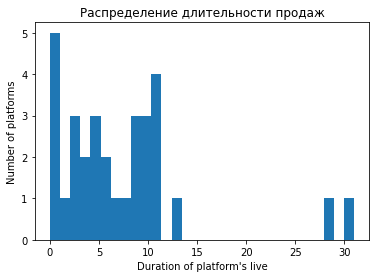

In [34]:
duration_list=[]
for plat in list_all_platforms:
    years= (games[games['platform']==plat].
                groupby('year_of_release')['sum_sales'].
            sum().index
           )
    delta = (years.max())-(years.min())
    if delta > 12:
        print(plat,'   ', delta, 'years')
    duration_list.append(delta)
plt.hist(duration_list,bins=30);
plt.title("Распределение длительности продаж")
plt.xlabel("Duration of platform's live")
plt.ylabel("Number of platforms")
from statistics import median
print('Медианное значение жизни платформы равно :', median(duration_list))

In [35]:
games.query('platform == "DS" ').groupby('year_of_release')['name'].count()

year_of_release
1985      1
2004     23
2005    118
2006    201
2007    376
2008    492
2009    403
2010    323
2011    153
2012     23
2013      8
Name: name, dtype: int64

In [36]:
sorted(duration_list)[-5:]

[11, 11, 13, 28, 31]

Медианное значение жизни платформ равно 6. Платформы крайне редко живут больше 11 лет. Cлучай платформы`DS` прожившей 28 лет связан с ошибкой в данных имется лишь одна игра вышедшая в 1985 годы, следущий выпуск был лишь через 19 лет в 2004 году. Год выпуска платформы 2004. 

In [37]:
games.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,unknown,0.02


Видимо, игра на самом деле была выпущена в 2007 году https://www.nintendo.co.jp/ds/software/a4qj/index.html

### Опредление актуального периода

In [38]:
print('Медианное значение жизни платформы равно :', median(duration_list))

Медианное значение жизни платформы равно : 6


Определяем **актуальный период** по медианной длительности жизни платформы 6 лет. т.е. с **2011 по 2016** года.

### Исключение данных до актуального периода

In [39]:
games_actual=games[games['year_of_release']>2010]

Изключаем платформы у которых нет продаж в 2016 году

In [40]:
actual_platforms=games_actual[games_actual['year_of_release']==2016]['platform'].unique()
actual_platforms

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [41]:
games_actual=games_actual[games_actual['platform'].isin(actual_platforms)]

In [42]:
len(games_actual)/len(games)

0.2139382145463391

### Платформы лидирующие по продажам

In [43]:
games_actual_top3=games_actual.query('platform in ["PS4","XOne","3DS"]')

In [44]:
pd.pivot_table(
    games_actual_top3, values='sum_sales', index=['year_of_release'],
    columns=['platform'], aggfunc=np.sum)

platform,3DS,PS4,XOne
year_of_release,,,
2011,63.20,NaN,NaN
2012,51.36,NaN,NaN
2013,56.57,25.99,18.96
2014,43.76,100.00,54.07
2015,27.78,118.90,60.14
2016,15.14,69.25,26.15


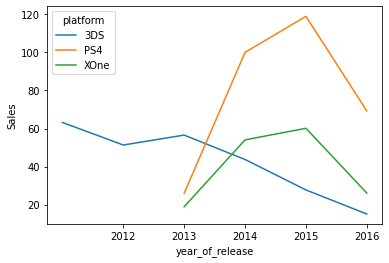

In [45]:
(pd.pivot_table(
    games_actual_top3, values='sum_sales', index=['year_of_release'],
    columns=['platform'], aggfunc=np.sum).
    #fillna(0).
     plot(kind='line',xticks=[2012,2013,2014,2015,2016])
);

plt.ylabel("Sales");
#plt.xlabel("Platform name");

In [46]:
games_actual_top3[games_actual_top3['year_of_release']==2016].groupby('platform')['sum_sales'].sum()

platform
3DS     15.14
PS4     69.25
XOne    26.15
Name: sum_sales, dtype: float64

Три платформы: *PS4,XOne,3DS* лидируют по продажам в 2015 и на начало 2016 года. Однако все платформы уже прошли пик своей популярности и их продажи падают.
Платформы *PS4* и *XOne* можно назвать потенциально прибыльными на 2017.

### ''Ящик с усами'', глобальные продажи по платформам

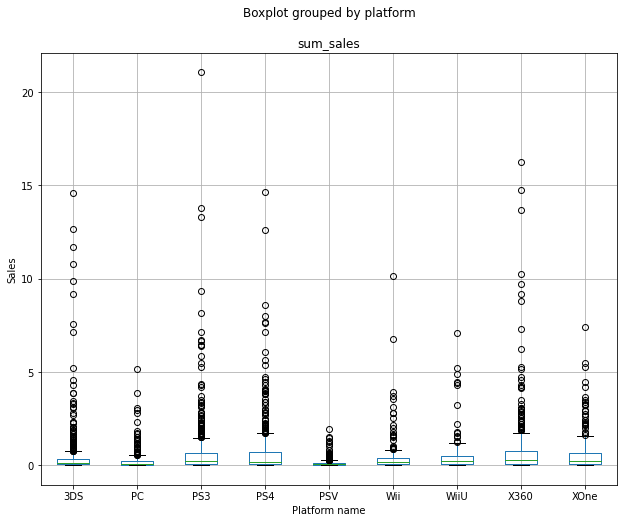

In [47]:
games_actual.boxplot(column='sum_sales',by='platform',grid=True,figsize=(10,8));

plt.ylabel("Sales");
plt.xlabel("Platform name");

In [48]:
games_actual.groupby('platform')['sum_sales'].max()

platform
3DS     14.60
PC       5.14
PS3     21.05
PS4     14.63
PSV      1.96
Wii     10.12
WiiU     7.09
X360    16.27
XOne     7.39
Name: sum_sales, dtype: float64

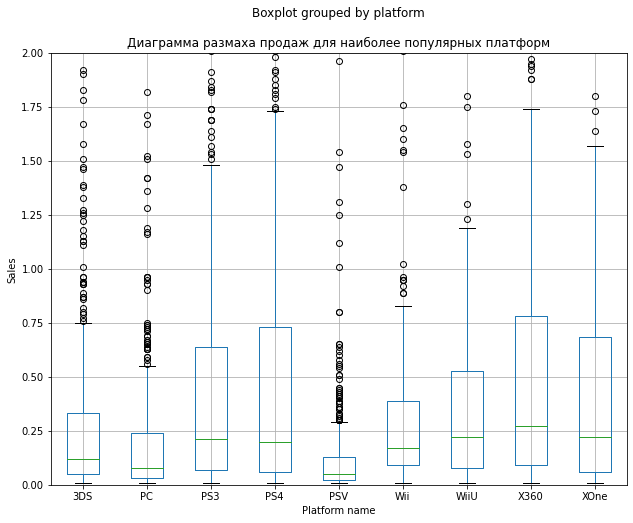

In [49]:
games_actual.boxplot(column='sum_sales',by='platform',figsize=(10,8),grid=True);
plt.ylim(0, 2);
plt.title("Диаграмма размаха продаж для наиболее популярных платформ");
plt.ylabel("Sales");
plt.xlabel("Platform name");

In [50]:
games_actual.groupby('platform')['sum_sales'].mean()

platform
3DS     0.503535
PC      0.251105
PS3     0.630212
PS4     0.801378
PSV     0.125431
Wii     0.482335
WiiU    0.559116
X360    0.763815
XOne    0.645020
Name: sum_sales, dtype: float64

Для каждой платформы распределение имеет выбросы в сторону больших значений, что говорит о большом разбросе популярности игр.
Самое высокое значение медианной доходности у платформы X360. Самая доходная игра была выпущена на протформе PS3. 
В среднем медианное значение продаж находится около 0.18, т.е. большая часть игр не пользуется популярностью. 

### Влияние отзывов на продажи 

In [51]:
games.groupby('platform')['name'].count().sort_values()[-3:]

platform
PS3    1305
DS     2121
PS2    2127
Name: name, dtype: int64

Для анализа мы выбираем 'PS2', поскольку по этой платформе больше всего данных

In [52]:
data_corr=games[games['platform']=='PS2'][['sum_sales','user_score','critic_score']]

In [53]:
data_corr.corr()

,sum_sales,user_score,critic_score
sum_sales,1.000000,0.175055,0.392536
user_score,0.175055,1.000000,0.565841
critic_score,0.392536,0.565841,1.000000


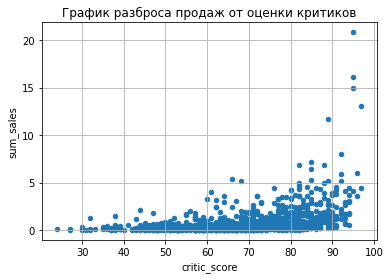

In [54]:
data_corr.plot(x='critic_score',
                      y='sum_sales',
                      kind='scatter',
                      grid=True);

plt.title('График разброса продаж от оценки критиков');

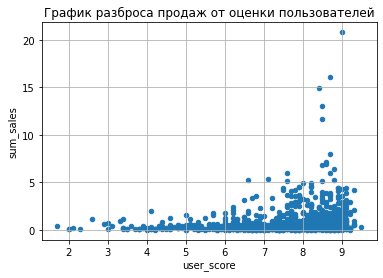

In [55]:
data_corr.plot(x='user_score',
                      y='sum_sales',
                      kind='scatter',
                      grid=True);

plt.title('График разброса продаж от оценки пользователей');

### Влияние отзывов на продажи 

In [56]:
def scores_by_platform(platform):
    user = games[games['platform']==platform][['sum_sales','user_score']].corr().loc['sum_sales','user_score']
    crit= games[games['platform']==platform][['sum_sales','critic_score']].corr().loc['sum_sales','critic_score']
    return f"{platform}  {np.around(user, decimals=2)} ,  {np.around(crit, decimals=2)}" 

In [57]:
print('platform user critic')
for p in actual_platforms:
    print(scores_by_platform(p))

platform user critic
PS4  -0.03 ,  0.41
3DS  0.22 ,  0.35
XOne  -0.07 ,  0.42
WiiU  0.4 ,  0.35
PS3  0.13 ,  0.43
PC  0.01 ,  0.26
X360  0.11 ,  0.39
PSV  0.01 ,  0.13
Wii  0.11 ,  0.18


Для всех расмотренных игровых платформ наблюдается положительная зависимость продаж от оценки критиков с уровнем корреляци 0.3-0.4. 

Корреляция с отзывами критиков выше чем с отзывами пользователей. Для некоторых платформ зависимости (корреляции) от отзывов пользователей нет, т.к. значение корреляции близко к нулю. 

### Жанры ирг. Порулярность и прибыльность.

In [58]:
games_actual.groupby('genre')['name'].count().sort_values(ascending=False)

genre
Action          1144
Role-Playing     392
Sports           357
Shooter          326
Misc             314
Adventure        291
Racing           176
Fighting         145
Simulation       122
Platform         111
Strategy          97
Puzzle            43
Name: name, dtype: int64

In [59]:
games_actual.groupby('genre')['sum_sales'].median().sort_values(ascending=False)

genre
Shooter         0.415
Sports          0.230
Platform        0.210
Fighting        0.180
Role-Playing    0.170
Racing          0.160
Misc            0.145
Action          0.140
Simulation      0.110
Strategy        0.070
Puzzle          0.060
Adventure       0.040
Name: sum_sales, dtype: float64

Больше все игр было выпущено в жанре Action (953) и ролевых игр (339). 
Самые доходный жанр Shooter имеет медианное значение доходности 0.44, за ним идут Sport с медианной доходностью 0.27. Наименьшая доходность в жанрах Adventure и Puzzle. 

## Портрет пользователя

### Топ-5 популярные платформы

In [60]:
games.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54


In [61]:
games_actual.groupby('platform')['na_sales'].sum()

platform
3DS      82.65
PC       29.88
PS3     168.26
PS4     108.74
PSV      12.47
Wii      48.56
WiiU     38.10
X360    226.80
XOne     93.12
Name: na_sales, dtype: float64

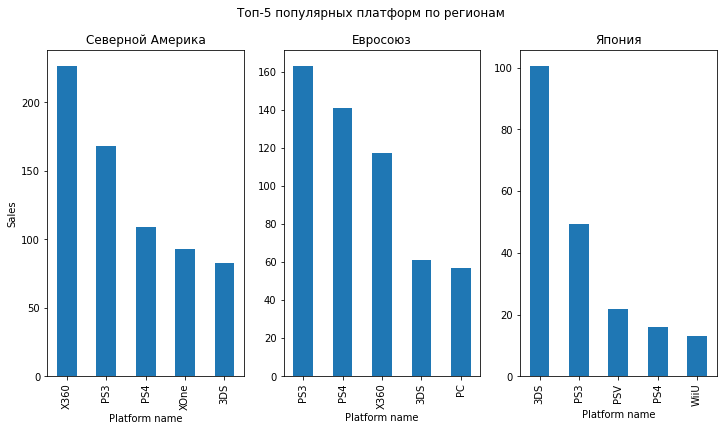

In [62]:
n_top=5

figsize = (12,6)

plt.subplot(1,3,1)
games_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:n_top] \
    .plot(kind='bar',figsize=figsize)
plt.title('Северной Америка')
plt.ylabel("Sales")
plt.xlabel("Platform name")

plt.subplot(1,3,2)
games_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:n_top] \
    .plot(kind='bar',figsize=figsize)
plt.title('Евросоюз')
plt.xlabel("Platform name")

plt.subplot(1,3,3)
games_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:n_top] \
    .plot(kind='bar',figsize=figsize)
plt.title('Япония')
plt.xlabel("Platform name")

plt.suptitle(f'Топ-{n_top} популярных платформ по регионам')
plt.show()

В северной америке по продажам лидируем платформа X360, в европе PS4, а в Японии 3DS. В европе и северной амереке 3DS находится на 5 месте. Европейский рынок и рынок северной америке похожи между собой, но отличаются от японского.  В японии PS4 только на 4 месте, а X360 не входит в топ-5.Еще одна особенность японского рынка в том что в топ-5 вошла платформа WiiU, которой нет ни в американском, ни в европейском рейтенге топ-5.  

### Топ-5 популярные жанры

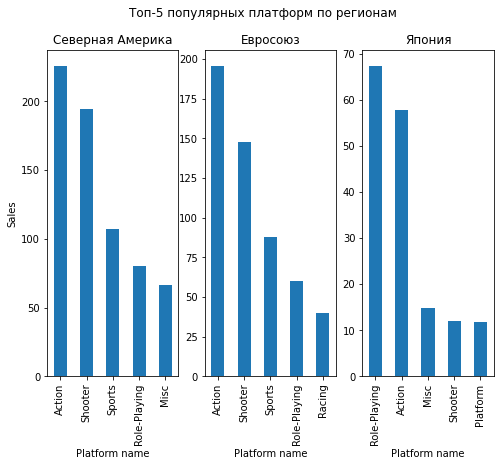

In [63]:
n_top=5

figsize = (8,6)

plt.subplot(1,3,1)
games_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:n_top] \
    .plot(kind='bar',figsize=figsize)
plt.title('Северная Америка')
plt.ylabel("Sales")
plt.xlabel("Platform name")

plt.subplot(1,3,2)
games_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:n_top] \
    .plot(kind='bar',figsize=figsize)
plt.title('Евросоюз')
plt.xlabel("Platform name")

plt.subplot(1,3,3)
games_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:n_top] \
    .plot(kind='bar',figsize=figsize)
plt.title('Япония')
plt.xlabel("Platform name")

plt.suptitle(f'Топ-{n_top} популярных платформ по регионам')
plt.show()

Распределения по жанрам на рынках северной америки и европы похожи между собой и сущесвенно отличаются от расспределения на рынке Японии.

Наиболее популярные жанры в Северной америке и Европе:
 - Action
 - Shooter
 - Sports
 
в Японии первое место у Role-Playing. Затем идут Action, Simulation.  Жанр Simulation встречается только в японском рейтенге.


### Влияние рейтинга на продажи

In [64]:
rating=games_actual.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum()

In [65]:
rating/rating.sum()

,na_sales,eu_sales,jp_sales
rating,,,
E,0.198719,0.208323,0.164137
E10+,0.141297,0.115344,0.051340
M,0.381471,0.379965,0.122260
RP,0.000000,0.000046,0.000000
T,0.134186,0.125729,0.150459
unknown,0.144327,0.170594,0.511804


В Северной Америке и Европе наибольшей популярность у игры с рейтингом M и E и большая доля игр с неизвестным рейтингом. Важно отметить что у у игр с неизвестным рейтингом большой вклад в доходности на всех рынках. Особенно это проявляеся на рынках Японии, где на такие игры приходится 53% продаж. Можно предположить что игры популярные (и возможно выпущенные) в Японии не участвуют в рейтенге ESRB.

In [66]:
import seaborn as sns

<AxesSubplot:ylabel='rating'>

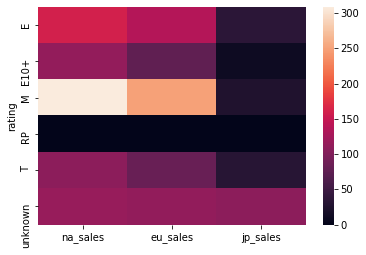

In [67]:
sns.heatmap(rating, annot=False)

## Проверка гипотиз

### Тест 1

Проверяем следующую гипотезу:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
Нулевая гипотеза формулируется с использованием знака равенства, поэтому нулевая и альтернативная гипотезы будут звучать следующим образом:

- H_0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H_1: средние пользовательские рейтинги платформ Xbox One и PC не равны друг другу

In [68]:
data_xo=games_actual.query('platform == "XOne" and user_score == user_score')['user_score']
data_pc=games_actual.query('platform == "PC" and user_score == user_score')['user_score']

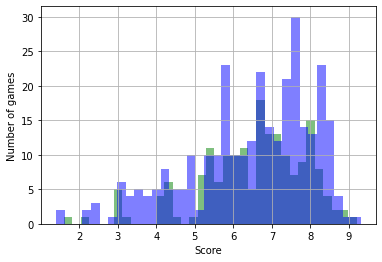

In [69]:
data_xo.hist(bins=35, alpha=0.5, color='green')
data_pc.hist(bins=35, alpha=0.5, color='blue');

plt.ylabel("Number of games");
plt.xlabel("Score");

In [70]:
(len(data_xo),len(data_pc))

(182, 307)

версия 3

Размеры выборок близки поэтому используем **t-критерий Стьюдента**, т.е. используем `equal_var=True`. Пороговое значение `alpha` задаем 0.05 посколько стандартная величена в соц. науках и бизнесе. это более мягкое условие на опровержение нулевой гипотизы. Гипотиза двустороння поэтому значение `alternative='two-sided'` можно не указывать посколько это значение по умолчанию.

In [71]:
results = st.ttest_ind(data_xo,data_pc,equal_var=True) #вызов метода для проверки гипотезы

alpha = .05 # задайте значение уровня значимости

print('p-value= ', results.pvalue) # вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
if results.pvalue< alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value=  0.6267602271422398
Не получилось отвергнуть нулевую гипотезу


Т.е. у нас не получилось отвергнуть гипотизу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Тест 2

Проверяем следующию гипотезу:
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза формулируется с использованием знака равенства, поэтому нулевая и альтернативная гипотезы будут звучать следующим образом:

- H_0: средние пользовательские рейтинги жанров Action и Sports равны друг другу
- H_1: средние пользовательские рейтинги жанров Action и Sports не равны друг другу

In [72]:
data_action=games_actual.query('genre == "Action" and user_score == user_score')['user_score']
data_sport=games_actual.query('genre == "Sports" and user_score == user_score')['user_score']

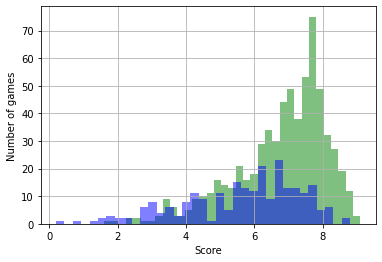

In [73]:
data_action.hist(bins=35, alpha=0.5, color='green')
data_sport.hist(bins=35, alpha=0.5, color='blue');

plt.ylabel("Number of games");
plt.xlabel("Score");

In [79]:
(len(data_action),len(data_sport))

(656, 241)

Размеры выборок отличаются поэтому вместо t-критерия Стюдента мы используем **t-критерий Уэлча**, для этого устанавливаем `equal_var=False`. Пороговое значение `alpha` задаем общепринятое значее 0.05. Доп. мотивацией для выбора этого значения служит предпочтение более мягких условий на подтверждение целевой гипотизы, чем `alpha = 0.01`.  Гипотиза двустороння поэтому значение `alternative='two-sided'` можно не указывать посколько это значение по умолчанию.

In [75]:
results = st.ttest_ind(data_action,data_sport,equal_var=False) #вызов метода для проверки гипотезы

alpha = .01 # задайте значение уровня значимости

print('p-value= ', results.pvalue) # вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
if results.pvalue< alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value=  3.2930114707043448e-18
Отвергаем нулевую гипотезу


Т.е. мы отвергаем нулевую гипотизу и делаем вывод, что данные указывают, на то что средние пользовательские рейтинги жанров Action и Sports не равны друг другу с высокой долей вероятности. 

## Общий вывод

Входе выполнения проекта была проведена предработка данных, проведен исседовательский анализ, составлен потрет пользователя, и проверены две гипотезы об пользовательских рейтегах игр. 

Анализ данных показал:

- медианное значение жизни платформ равно 6. Платформы крайне редко живут больше 11 лет.

- для получения актуальных результатов исследования был выбран и рассмотрен временной интервал с 2011 по 2016 года.

- лидирующие по продажам в 2015 и на начало 2016 года платформы: PS4,XOne,3DS. Платформы PS4 и XOne можно назвать потенциально прибыльными на 2016 и 2017 году.

- для каждой платформы распределение по продажам имеет выбросы в сторону больших значений, что говорит о большом разбросе популярности игр. Самое высокое значение медианной доходности у платформы X360. Самая доходная игра была выпущена на протформе PS3.

- наблюдается положительная зависимость продаж от оценки критиков с уровнем корреляции 0.3-0.4. 

- больше все игр было выпущено в жанре Action (953) и ролевых игр (339). Самый доходный жанр Shooter имеет медианное значение доходности 0.44, за ним идут Sport с медианной доходностью 0.27. Наименьшая доходность в жанрах Adventure и Puzzle. 

- в отношении продаж и жанров игр выявлено сходсво рынков Северной Америки и Европы и их отличее от рынка Японии. В северной америке по продажам лидируем платформа X360, в европе PS4, а в Японии 3DS. Одна особенность японского рынка в том что в топ-5 вошла платформа WiiU, которой нет ни в американском, ни в европейском рейтенге топ-5.


Исспользование t-критерия мы пришли к следущим заключениям: 
- у нас не получилось отвергнуть гипотизу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Средние пользовательские рейтинги игр жанров Action и Sports отличаются. Пользователи в среднем оценивают Action выше, чем Sports, что также отражается в уровне продаж.
